# LogRegression (implementation)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

In [2]:
import math
from scipy.special import expit

In [ ]:
# logcoef gets datasets
# returns dictionary with names or numbers 
#of regressors and coefficients respectively


In [3]:
def logcoef(X, Y):
    n, d = X.shape

# 1
# creates lists with regressors\` names if its possible
# else rcreate numbers in ascending order 
# in both cases adds 'intercept'

    try:
        l = list(X.columns)
    except:
        l = list(range(1,d + 1))
    finally:
        l.insert(0, 'Intercept')

# 2
# conver data into matrices

    try:
        if type(Y).__name__ != 'ndarray':
            Y = Y.as_matrix()
        if type(X).__name__ != 'ndarray':
            X = X.as_matrix()
    except:
        print("Error occurred: data cannot be converted into matix")
        
# 3
# If data doesn\'t have 0-1 format
# function trys to convert into it
        
    if all((Y[i] == 1 and Y[i] == 0) for i in Y) == False:
        Y[Y != 1] = 0
        print('Dependent categorical variable was resigned to (0, 1) values')
# 4
# Add ones column ito regressors matrix
# Create cost function as earlier (at paper) simplified Y distribution with minus assigned

    XD = np.hstack((np.ones((n, 1)), X))
    def CostF(betta):
        Xb = np.dot(XD, betta)
        YXb = Y * Xb
        e = np.exp(Xb)
        s = -sum(YXb - np.log(1 + e))
        return (s)
# 5   
# Minimize cost functon with gradient descent method

    b = (optimize.minimize(CostF, np.ones((d + 1, 1))/100)).x
    b = dict(zip(l, list(b)))
    return b

# Compare with already existed Python\`s function

In [4]:
from sklearn.linear_model import LogisticRegression

#### data loading

In [5]:
data = pd.read_excel('C:\\Users\\Galia\\desktop\\wine2.xlsx')
data = data[ : 130]
# print(data)

In [6]:
Y = data.Site
X = data[['Alcogol', 'OD OD280/OD315 of diluted wines']]
# print(Y)
# print(X)

### Use sklearn logRegression 

In [7]:
LLM = LogisticRegression()
LLM.fit(X, Y)
plc = np.hstack((LLM.intercept_, LLM.coef_[0,:]))
print(plc)

[ 3.19764495 -0.18978803 -0.2212594 ]


In [8]:
lc = logcoef(X, Y)
print(lc)

Dependent categorical variable was resigned to (0, 1) values
{'Intercept': -74.511610733535846, 'Alcogol': 5.1285843437026486, 'OD OD280/OD315 of diluted wines': 2.5087460823715868}


### Visualization

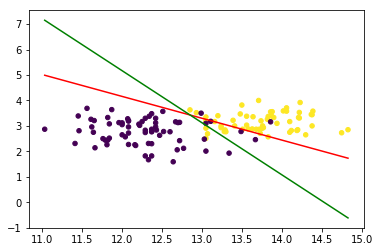

In [12]:
# convert data into matrices
X = X.as_matrix()
Y = Y.as_matrix()

# define x axis bound and visualize points

x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 1000)
plt.scatter(X[:, 0], X[:, 1], c=Y, s = 20)

# red line corresponds function with python\`s coefficients
# green - selfimplemented function
plt.plot(x, (-plc[0]-plc[1]*x)/plc[2], c = 'red')
plt.plot(x, (-lc['Intercept']-lc['Alcogol']*x)/lc['OD OD280/OD315 of diluted wines'], c = 'green')
plt.show()